<a href="https://colab.research.google.com/github/parkjunseo74/Deep-learning-for-AI/blob/main/chapter04_getting_started_with_neural_networks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [14]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [15]:
train_labels[0]

1

In [16]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [17]:
dict([(value, key) for (key, value) in word_index.items()])

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [19]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [20]:
word_index['sorted']

18522

In [21]:
reverse_word_index[18522]

'sorted'

In [22]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [23]:
train_data.shape

(25000,)

In [24]:
len(train_data[0])

218

In [25]:
# 모두 다른 길이를 가지고 있음
len(train_data[1])

189

In [26]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
x_train.shape

(25000, 10000)

In [29]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.5618 - accuracy: 0.7713 - val_loss: 0.4479 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3709 - accuracy: 0.8878 - val_loss: 0.3482 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2818 - accuracy: 0.9094 - val_loss: 0.3075 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2265 - accuracy: 0.9283 - val_loss: 0.2838 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1900 - accuracy: 0.9403 - val_loss: 0.2734 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1587 - accuracy: 0.9504 - val_loss: 0.2912 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1372 - accuracy: 0.9601 - val_loss: 0.2864 - val_accuracy: 0.8842
Epoch 8/20
30

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

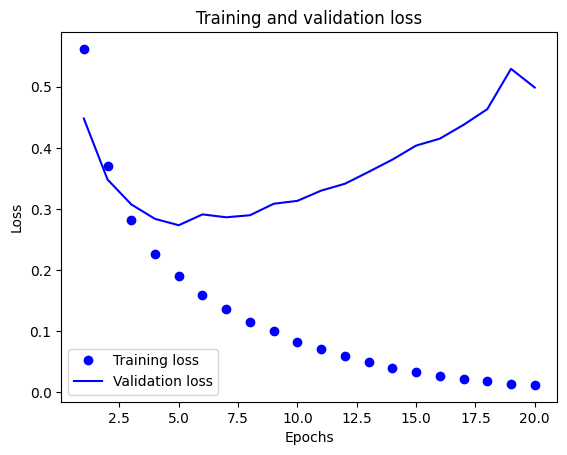

In [35]:
# training loss는 항상 줄어들고 있음. validation loss는 줄어들때도 상승할때도 있음. 특히 4번째 epoch 이후로는 상승세를 보임
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

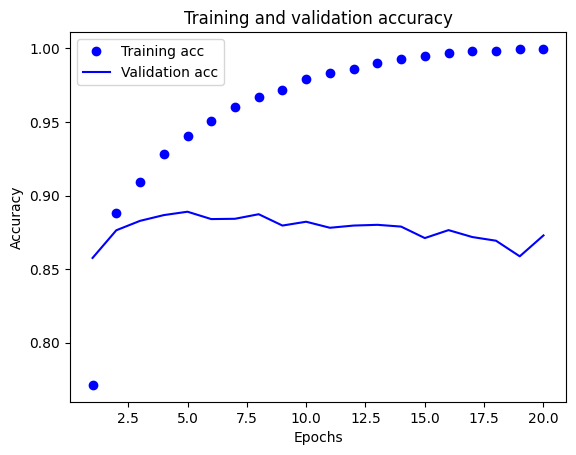

In [36]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])

In [38]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [39]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.6121 - accuracy: 0.7566 - val_loss: 0.5603 - val_accuracy: 0.8190
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5158 - accuracy: 0.8472 - val_loss: 0.4979 - val_accuracy: 0.8389
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4557 - accuracy: 0.8699 - val_loss: 0.4532 - val_accuracy: 0.8517
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4108 - accuracy: 0.8843 - val_loss: 0.4207 - val_accuracy: 0.8584
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3760 - accuracy: 0.8933 - val_loss: 0.3942 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3481 - accuracy: 0.9011 - val_loss: 0.3739 - val_accuracy: 0.8717
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3251 - accuracy: 0.9059 - val_loss: 0.3577 - val_accuracy: 0.8754
Epoch 8/20
30

In [40]:
history2_dict = history2.history
history2_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

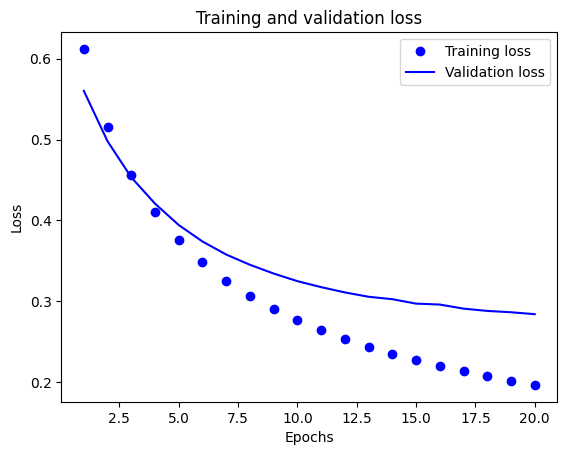

In [41]:
import matplotlib.pyplot as plt
history2_dict = history2.history
loss_values = history2_dict["loss"]
val_loss_values = history2_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

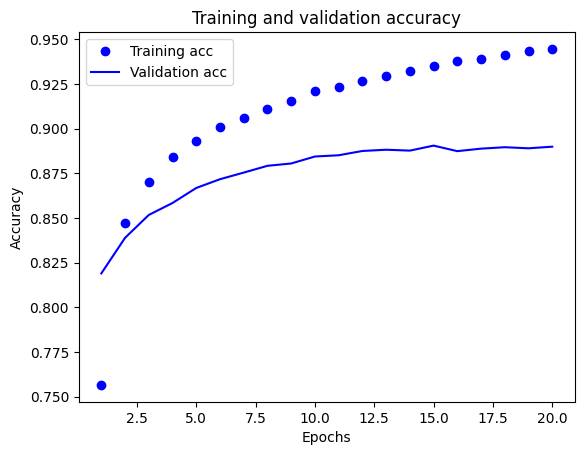

In [42]:
plt.clf()
acc = history2_dict["accuracy"]
val_acc = history2_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [43]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4596 - accuracy: 0.8165
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2739 - accuracy: 0.9016
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2156 - accuracy: 0.9225
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2893 - accuracy: 0.8836


In [44]:
results

[0.28928762674331665, 0.8835600018501282]

### Using a trained model to generate predictions on new data

In [45]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.23110409],
       [0.9992931 ],
       [0.93525934],
       ...,
       [0.1421493 ],
       [0.09811917],
       [0.6617347 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [46]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [47]:
len(train_data)

8982

In [48]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [49]:
len(test_data)

2246

In [50]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [51]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [52]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [53]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [54]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [57]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [58]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [59]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.8357 - accuracy: 0.4945 - val_loss: 1.9414 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.6063 - accuracy: 0.6756 - val_loss: 1.4001 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1908 - accuracy: 0.7429 - val_loss: 1.1958 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.9709 - accuracy: 0.7913 - val_loss: 1.0803 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8049 - accuracy: 0.8280 - val_loss: 1.0184 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6707 - accuracy: 0.8588 - val_loss: 0.9807 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 80ms/step - loss: 0.5626 - accuracy: 0.8815 - val_loss: 0.9391 - val_accuracy: 0.7960
Epoch 8/20
16

**Plotting the training and validation loss**

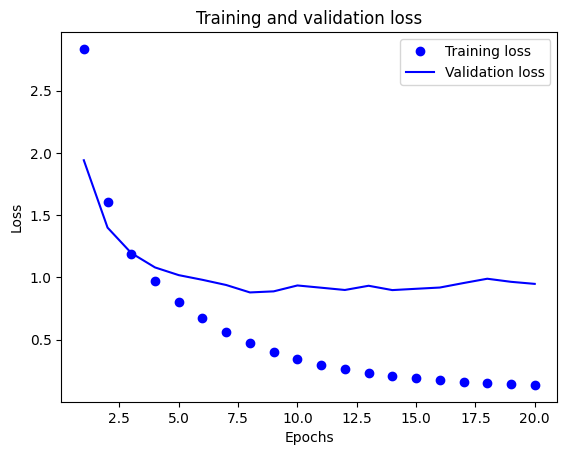

In [60]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

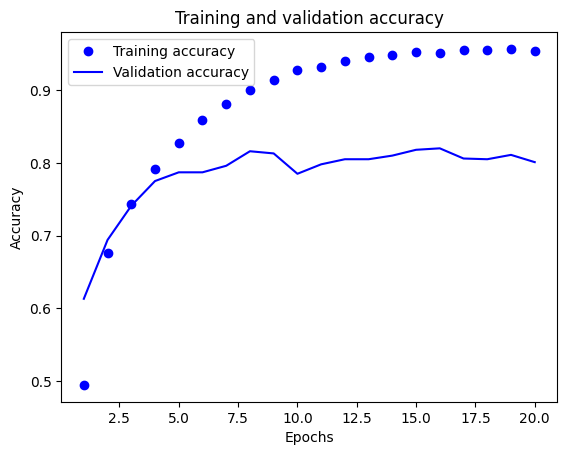

In [61]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [62]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 49ms/step - loss: 2.6224 - accuracy: 0.5313
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.4459 - accuracy: 0.6937
Epoch 3/9
18/18 [==============================] - 1s 41ms/step - loss: 1.1033 - accuracy: 0.7585
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.9027 - accuracy: 0.8018
Epoch 5/9
18/18 [==============================] - 1s 43ms/step - loss: 0.7499 - accuracy: 0.8361
Epoch 6/9
18/18 [==============================] - 1s 67ms/step - loss: 0.6187 - accuracy: 0.8674
Epoch 7/9
18/18 [==============================] - 1s 63ms/step - loss: 0.5141 - accuracy: 0.8916
Epoch 8/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4314 - accuracy: 0.9058
Epoch 9/9
71/71 [==============================] - 1s 6ms/step - loss: 0.9101 - accuracy: 0.7934


In [63]:
results

[0.9101163744926453, 0.7934104800224304]

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18388245770258238

### Generating predictions on new data

In [65]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [66]:
predictions[0].shape

(46,)

In [67]:
np.sum(predictions[0])

1.0

In [68]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [69]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [70]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [71]:
# sparse_categorical_crossentropy와 categorical_crossentropy를 사용하는 시점의 차이를 알아야 함.
# 전자의 경우 데이터가 기본적인 정수 형태([1,2,3])라면, 후자의 경우는 원-핫 벡터 형태([0,1,0])로 변형되었음.
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 3.7098 - accuracy: 0.1145 - val_loss: 3.5309 - val_accuracy: 0.0630
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 3.1917 - accuracy: 0.0758 - val_loss: 2.7119 - val_accuracy: 0.0890
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 2.0957 - accuracy: 0.3973 - val_loss: 1.7951 - val_accuracy: 0.4510
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.5743 - accuracy: 0.5857 - val_loss: 1.5592 - val_accuracy: 0.6150
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3687 - accuracy: 0.6312 - val_loss: 1.4584 - val_accuracy: 0.6220
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2335 - accuracy: 0.6503 - val_loss: 1.3991 - val_accuracy: 0.6350
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1163 - accuracy: 0.6873 - val_loss: 1.3677 - val_accuracy: 0.6520
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [72]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [73]:
train_data.shape

(404, 13)

In [74]:
test_data.shape

(102, 13)

In [75]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [76]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [77]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [78]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [79]:
all_scores

[1.8636016845703125, 2.265979766845703, 2.4398162364959717, 2.4514808654785156]

In [80]:
np.mean(all_scores)

2.2552196383476257

**Saving the validation logs at each fold**

In [82]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0


KeyboardInterrupt: 

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary